## 3.2 Gradient Descent

Loss function $$J(w) = \frac{1}{n} \sum \limits_{i=1} ^{n} (y^{i}-\hat{y^{i}})^2 $$
where n is the number of samples, $y^{i}$ are the observed values, $\hat{y^{i}}$ are the predicted values

In [1]:
import pickle
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [2]:
## load data
def load_data():
    df = pd.read_csv('normalized.txt', header=None)
    df.columns = ['area', 'bdrm', 'price']
    df ['intercept'] = 1
    X = df[['intercept', 'area', 'bdrm']].values
    y = df['price'].values
    return X, y

In [3]:
def compute_error(pred, truth):
    # compute the mean squared error
    ## to do
    s = 0
    for i in range(len(pred)):
        s += (pred[i] - truth[i]) ** 2
    return s/pred.shape[0]

In [4]:
def compute_grad(X, w_ori, y, num_dim):
    # compute the gradient
    ## to do
    s = 0
    for i in range(num_dim):
        s += (sum(np.multiply(w_ori[0], X[i])) - y[i][0]) * X[i][0]
    w_0 = 2 * s / num_dim

    s = 0
    for i in range(num_dim):
        s += (sum(np.multiply(w_ori[0], X[i])) - y[i][0]) * X[i][1]
    w_1 = 2 * s / num_dim

    s = 0
    for i in range(num_dim):
        s += (sum(np.multiply(w_ori[0], X[i])) - y[i][0]) * X[i][2]
    w_2 = 2 * s / num_dim

    return np.array([w_0, w_1, w_2])

In [5]:
## training with gradient descent
def train(X, y, learning_rate, max_num_iter=1000):
    """
    write a function which apply Gradient descent to estimate parameter w
    Please also record the mean squared error in the iteration process and save it to error history
    """
    error_history = []
    num_dim = X.shape[0]
    
   # initialize w
    w = np.zeros((1, 3), dtype=np.float32)
    
    # ensure dimension is 2-dim
    y = y.reshape(y.shape[0], 1)
    
    for steps in range(max_num_iter):
        ## to do
        # compute gradient descent over all training examples
        grad = compute_grad(X, w, y, num_dim)
        # perform gradient descent (vector update)
        w = w - learning_rate * grad
        # get predictions
        pred = np.dot(X, w[0])
        # compute MSE and add it into error_history
        err = compute_error(pred, y)
        error_history.append(err)
    
    return w, error_history

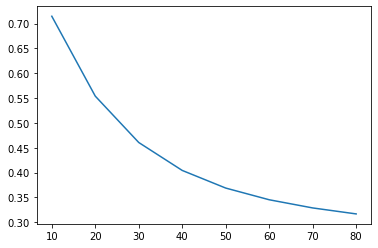

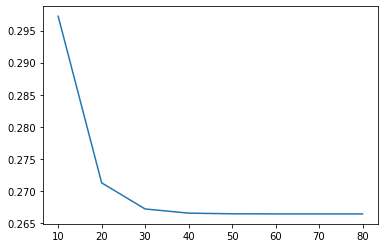

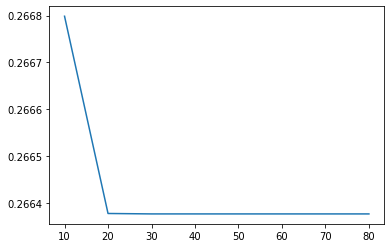

In [6]:
## fit regression model and plot the MSE/SSE vs. number of iterations
X, y = load_data()
learning_rates = [0.01, 0.1, 0.3]
for l_rate in learning_rates:
    w, error_history = train(X, y, l_rate, 100)
    plt.plot([10, 20,30,40,50, 60,70, 80], [error_history[9], 
            error_history[19], error_history[29],
            error_history[39],error_history[49],error_history[59],
            error_history[69],error_history[79]])
    plt.show()

## 3.3 Make prediction based on the linear regression model you get

In [7]:
# get the values used for normalization
f = open('mean_std.pk', 'rb')
norm_params = pickle.load(f)
l, b, p = norm_params['area'], norm_params['n_bedroom'], norm_params['price']
f.close()

In [11]:
# first normalize the features and then make predictions

## to do
new_data = np.array([1, (3150-l['mean'])/l['std'], (4-b['mean'])/b['std']])
pred_price = np.dot(w[0], new_data) * p['mean'] + p['std']

# print out the predicted value
print("The w is {}, and pred_price is {}\n".format(w, round(pred_price, 2)))

The w is [[-8.41620680e-18  8.84356223e-01 -5.15677415e-02]], and pred_price is 540386.72

